In [1]:
import pandas as pd
import json
import ast
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_path = "../../URLs_Data_Filteration/Reddit/"

In [3]:
ls "../../URLs_Data_Filteration/Reddit"

 Volume in drive D has no label.
 Volume Serial Number is 4623-EF98

 Directory of D:\test\mapbox-android-sample-master\src\New folder\URLs_Data_Filteration\Reddit

01/31/2022  04:25 PM    <DIR>          .
01/31/2022  04:25 PM    <DIR>          ..
01/20/2022  09:02 AM           686,888 df_reddits_4_months_urls.csv
01/20/2022  09:02 AM            19,515 df_reddits_4_months_urls_1_link.csv
01/20/2022  09:02 AM            29,381 df_reddits_4_months_urls_more.csv
01/20/2022  09:02 AM           438,149 df_reddits_dec_urls.csv
01/20/2022  09:02 AM            12,706 df_reddits_dec_urls_1_link.csv
01/20/2022  09:02 AM            23,795 df_reddits_dec_urls_more.csv
               6 File(s)      1,210,434 bytes
               2 Dir(s)  42,454,306,816 bytes free


In [4]:
def save(set_, filepath):
    with open(filepath, 'w') as f:
        f.write(json.dumps(set_))

def read(filepath):
    with open(filepath, 'r') as f:
        return json.loads(f.read())

# Reddits

## 4 Months

In [6]:
df_comments_4_months_urls = pd.read_csv(data_path + "df_reddits_4_months_urls.csv")

In [7]:
df_comments_4_months_urls.head(1)

,_index,_type,_id,_score,id,name,permalink,text,parent_id,subreddit,author,created_at,entities.urls,sentiment_blob,sentiment_nltk,urls,n_urls
0,reddit,_doc,Yla2ZnoBZsCJ_ScUHdvG,1.0,glh36zw,t1_glh36zw,/r/TIHI/comments/l9bdw3/thanks_i_hate_johnny_d...,"**OP needs help. Also, they hate it because......",t3_l9bdw3,r/TIHI,ThanksIHateClippy,2021-01-31 12:29:47+00:00,[{'display_url': 'https://github.com'}],Negative,Neutral,['https://github.com/Artraxon/tihibot'],1


In [8]:
df_comments_4_months_urls.columns

Index(['_index', '_type', '_id', '_score', 'id', 'name', 'permalink', 'text',
       'parent_id', 'subreddit', 'author', 'created_at', 'entities.urls',
       'sentiment_blob', 'sentiment_nltk', 'urls', 'n_urls'],
      dtype='object')

In [10]:
df_comments_4_months_urls.rename(
    columns={
        "snippet.topLevelComment.snippet.likeCount": "n_likes",
        "snippet.totalReplyCount": "n_replies",
    },
    inplace=True,
)

### score

In [9]:
df_comments_4_months_urls._score.describe()

count    657.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: _score, dtype: float64

In [10]:
df_comments_4_months_urls._score.mean()

1.0

#### ALL SCORES ARE ONES

<AxesSubplot:>

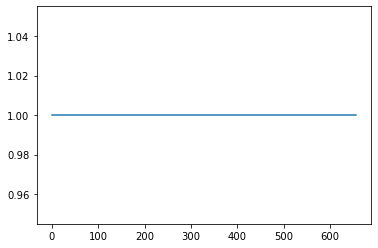

In [13]:
df_comments_4_months_urls._score.plot()

##  dec

In [14]:
df_comments_dec_urls = pd.read_csv(data_path + "df_reddits_dec_urls.csv")

In [15]:
df_comments_dec_urls.head(1)

,_index,_type,_id,_score,id,name,permalink,text,parent_id,subreddit,author,created_at,entities.urls,sentiment_blob,sentiment_nltk,urls,n_urls
0,reddit,_doc,KlbLZnoBZsCJ_ScUdu6b,1.0,ghmy7as,t1_ghmy7as,/r/AskReddit/comments/knx3g5/people_who_were_v...,**Attention! [Serious] Tag Notice**\n\n* Jokes...,t3_knx3g5,r/AskReddit,AutoModerator,2020-12-31 20:09:48+00:00,"[{'display_url': 'https://www.rainn.org'}, {'d...",Positive,Neutral,['https://www.rainn.org/about-national-sexual-...,6


### Likes

In [16]:
df_comments_dec_urls._score.describe()

count    412.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: _score, dtype: float64